In [391]:
from __future__ import print_function
import getopt
import logging
import os
import sys
import tweepy 
import pandas as pd
import json
import requests
from io import StringIO
import datetime
import matplotlib
import numpy as np
import matplotlib.dates as mdates


consumer_key = 'OsfrUJ0hQvJtNQUaHyzMG7Wn5'
consumer_secret = 'MFuEPApr4ZxEb5fwWk1hjEOlirAc2pVNAXtpSARTvqJxXUBcev'
access_token = '21319565-1R5Bhequs1IXSlcKyFk1tpBm0VsN5G7Ug9cy4xKTw'
access_secret = 'y1Fj33dlzstrfDZ3NSntk72ZqxVZlBCsF32OQwJoMlOzK'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)
end_date = datetime.datetime(2017, 8, 1,0, 0, 0)

archive = pd.read_csv('twitter-archive-enhanced.csv')
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
images = pd.read_csv(StringIO(r.text), sep='\t')

In [390]:
r

<Response [200]>

In [4]:

from timeit import default_timer as timer
retweet_and_favourite_count = []
fails_dict = []
with open('tweet_json.txt', mode="w") as file:
    for i in list(archive.tweet_id):
        try:
            tweet = api.get_status(str(i))
            print(i)
            file.write(json.dumps(tweet._json))
            retweet_and_favourite_count.append({
                "tweet_id" : str(i),
                "retweet_count" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count']
                })
        
        except:
            print("TweepError for id:  " + str(i))
            fails_dict.append(i)
            pass
            
          
#retweet_count_and_favorite_count = pd.DataFrame(retweet_and_favorite_count, columns=["tweet_id",'retweet_count', 'favorite_count'])
# retweet_and_favorite_count = pd.DataFrame(retweet_and_favorite_count, columns=["tweet_id",'retweet_count', 'favorite_count'])

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
TweepError for id:  888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
88226811019

822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343

767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
TweepError for id:  759566828574212096
75955729961

Rate limit reached. Sleeping for: 683


758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
TweepError for id:  754011816964026368
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
75217315293

705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249

678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 688


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029

In [37]:
retweet_and_favourite = pd.DataFrame(retweet_and_favourite_count, columns=["tweet_id",'retweet_count', 'favorite_count'])

retweet_and_favourite ASSESING AND CLEANING -
2331 rows.
-check for missing rows too - untidy?
-check for duplicates (shouldn't be any as it was pulled from twitter but just in case)
-merge with other dataframes - remove the tweet_ids that are not in all 3. 


In [127]:
retweet_and_favourite

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7409,35124
1,892177421306343426,5515,30407
2,891815181378084864,3639,22859
3,891689557279858688,7588,38414
4,891327558926688256,8160,36667
...,...,...,...
2326,666049248165822465,38,94
2327,666044226329800704,122,260
2328,666033412701032449,39,107
2329,666029285002620928,41,117


In [128]:
#check for duplicates - none
retweet_and_favourite.drop_duplicates()

retweet_and_favourite.info()

retweet_and_favourite['tweet_id'] =retweet_and_favourite['tweet_id'].astype(str).astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


This shows that there were no duplicates and no missing rows as all of the rows have the same amount of non-null rows.

In [129]:
retweet_and_favourite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


Archive data assessing and cleaning - 
Check for duplicates - drop any if so.
We only want original posts and therefore we can delete the retweeted one and then delete the columns - retweeted_status_id	retweeted_status_user_id,retweeted_status_timestamp, also the in reply to columns as replys are not original.
rating_denominator should be out of 10 so I will remove all of the rows that are not out of 10 
tidy up the stage of dogs - in 4 columns at the moment. Floof isn't even a stage of dogs so this column will be removed first.
I will merge the dataframes before tidying up the columns.

In [130]:
#Check for duplicates - there are none
archive = archive.drop_duplicates(subset='tweet_id', keep='first')
print(archive)

                tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/i

In [339]:
#remove floofer seeing as it is not a stage of dog - just shows if the dog is fluffy
archive = archive.drop(columns =['floofer']) 

archive["dog_stage"] = archive["doggo"] + archive["pupper"] +archive['puppo']
archive['dog_stage']

archive = archive.drop(columns =['doggo', 'pupper', 'puppo']) 

In [340]:
archive['dog_stage'].value_counts()

NoneNoneNone       1985
NonepupperNone      245
doggoNoneNone        84
NoneNonepuppo        29
doggopupperNone      12
doggoNonepuppo        1
Name: dog_stage, dtype: int64

In [341]:
#change the type of dog
d = {'NoneNoneNone':'None','NonepupperNone':'Pupper','doggoNoneNone': 'Doggo' , 'NoneNonepuppo': 'Puppo'}
archive = archive.replace(d)

In [342]:
#looked at the text of doggopupperNone - all included more than one dog / dog type so will remove these as not accurate
mixed = archive['dog_stage'] == 'doggopupperNone'
mixed1 = archive[mixed]
mixedind = mixed1.index
archive = archive.drop(mixedind) 


#looked at the text of doggoNonepuppo - only one. It should be puppo, so change to puppo

d1 = {'doggoNonepuppo':'Puppo'}
archive = archive.replace(d1)

archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None


<AxesSubplot:title={'center':'Dog stages vs amount of tweets'}>

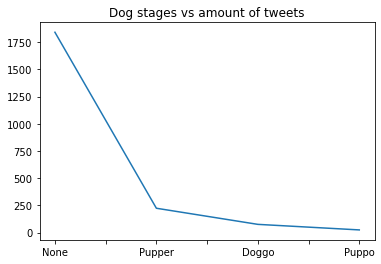

In [350]:
#check to see if the changes have been made.
archive['dog_stage'].value_counts()
dogstages = archive['dog_stage'].value_counts()

dogstages.plot(title = 'Dog stages vs amount of tweets')

In [344]:
#we do not want retweets - so therefore delete all retweets rows and then delete the columns to do with retweets
#I did this by seeing which rows had null values in these columns as these are the non retweets
#also the columns about who they are replying to as this is irrelevant

archive = archive[archive['retweeted_status_id'].isnull()]
archive = archive[archive['retweeted_status_user_id'].isnull()]
archive = archive[archive['retweeted_status_timestamp'].isnull()]
archive = archive[archive['retweeted_status_timestamp'].isnull()]

archive = archive.drop(columns =['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])
archive = archive.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id'])

In [345]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2165 non-null   int64 
 1   timestamp           2165 non-null   object
 2   source              2165 non-null   object
 3   text                2165 non-null   object
 4   expanded_urls       2107 non-null   object
 5   rating_numerator    2165 non-null   int64 
 6   rating_denominator  2165 non-null   int64 
 7   name                2165 non-null   object
 8   dog_stage           2165 non-null   object
dtypes: int64(3), object(6)
memory usage: 169.1+ KB


In [ ]:
#Drop rating_denominator and rename rating_numerator to rating - I 
#saw on the info that most people give a score more than 10 out of 10. 
#Therefore I dropped the denominator and renamed the numerator

equals10 = archive['rating_denominator'] == 10
archive = archive[equals10]
archive = archive.drop(columns =['rating_denominator']) 
archive = archive.rename(columns={'rating_numerator': "dog_rating (/10)"})
archive['dog_rating (/10)'].value_counts()
#looked at the ratings - some are really high. I checked the highest which is 1776 and this is actually the rating someone gave their dog so I kept it


Images data cleaning 
Check for duplicates - drop if so.
p1,	p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog - not obvious what they mean so I will rename them.
Remove img_num as not relevant - make it more tidy


In [132]:
images

,tweet_id,jpg_url,Guess_1,Guess_1-T/F,Guess_2,Guess_2-T/F,Guess_3,Guess_3-T/F
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,True
...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True


In [133]:
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     2075 non-null   int64 
 1   jpg_url      2075 non-null   object
 2   Guess_1      2075 non-null   object
 3   Guess_1-T/F  2075 non-null   bool  
 4   Guess_2      2075 non-null   object
 5   Guess_2-T/F  2075 non-null   bool  
 6   Guess_3      2075 non-null   object
 7   Guess_3-T/F  2075 non-null   bool  
dtypes: bool(3), int64(1), object(4)
memory usage: 103.3+ KB


In [134]:
#Check for duplicates - there are none
images = images.drop_duplicates(subset='tweet_id', keep='first')
print(images)

                tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

                     Guess_1  Guess_1-T/F             Guess_2  Guess_2-T/F 

I wanted to drop the conf columns due to that not being relevant, I feel as though the True or False part is more relevant. I also dropped img_num here.

In [364]:
images = images.rename(columns={'p1': 'Guess_1', 'p2': 'Guess_2', 'p3': 'Guess_3','p1_dog': 'Guess_1-T/F', 'p2_dog': 'Guess_2-T/F','p3_dog': 'Guess_3-T/F' })
images = images.drop(columns =['p1_conf', 'p2_conf', 'p3_conf', 'img_num']) 
#p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog

images

,tweet_id,jpg_url,Guess_1,Guess_1-T/F,Guess_2,Guess_2-T/F,Guess_3,Guess_3-T/F
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,True
...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True


I then wanted to merge the archive and images dataframes. I used inner merge so that rows that were not in both would be deleted as I felt it was important that we have all data for all rows. Otherwise this would not be tidy -this is a tidy up step.

I wanted to drop any duplicates. I would then merge with the other dataframe.

In [136]:
#merge images and archive. Using inner deletes all the tweet_ids not in both and therefore with lots of NaN
alldata = pd.merge(archive, images, how='inner', on = 'tweet_id')
alldata

,tweet_id,timestamp,source,text,expanded_urls,dog_rating (/10),name,dog_stage,jpg_url,Guess_1,Guess_1-T/F,Guess_2,Guess_2-T/F,Guess_3,Guess_3-T/F
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,True
1963,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
1964,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,True
1965,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True


In [169]:
#Check for duplicates - there are none
alldata = alldata.drop_duplicates(subset='tweet_id', keep='first')
print(alldata)

                tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
1962  666049248165822465  2015-11-16 00:24:50 +0000   
1963  666044226329800704  2015-11-16 00:04:52 +0000   
1964  666033412701032449  2015-11-15 23:21:54 +0000   
1965  666029285002620928  2015-11-15 23:05:30 +0000   
1966  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/i

Next I merged the retweet_count_and_favorite_count to the other 2 - again I used the inner merge so that the rows not in both would be removed due to tidiness.
There were 16 colummns. 
The timestamp will need to be tidied up. 
Name - will have to see if any of the names pulled over were not actually names.
I will look at the source - see if I can tidy this up.
Show if any missing data - should not be due to the merge.

In [170]:
#merge together using inner to get rid of tweet_id's that do not exist over all 3 sources
all3data = pd.merge(alldata, retweet_and_favourite, how='inner', on = 'tweet_id')

In [171]:
all3data.info()
all3data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 1959
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1960 non-null   int64 
 1   timestamp         1960 non-null   object
 2   source            1960 non-null   object
 3   text              1960 non-null   object
 4   expanded_urls     1960 non-null   object
 5   dog_rating (/10)  1960 non-null   int64 
 6   name              1960 non-null   object
 7   dog_stage         1960 non-null   object
 8   jpg_url           1960 non-null   object
 9   Guess_1           1960 non-null   object
 10  Guess_1-T/F       1960 non-null   bool  
 11  Guess_2           1960 non-null   object
 12  Guess_2-T/F       1960 non-null   bool  
 13  Guess_3           1960 non-null   object
 14  Guess_3-T/F       1960 non-null   bool  
 15  retweet_count     1960 non-null   int64 
 16  favorite_count    1960 non-null   int64 
dtypes: bool(3), in

,tweet_id,dog_rating (/10),retweet_count,favorite_count
count,1.960000e+03,1960.000000,1960.000000,1960.000000
mean,7.356028e+17,11.699490,2357.611735,8018.500510
std,6.762073e+16,41.017358,4230.275738,11827.054232
min,6.660209e+17,0.000000,11.000000,69.000000
25%,6.757072e+17,10.000000,526.750000,1700.750000
50%,7.080110e+17,11.000000,1125.000000,3585.000000
75%,7.874779e+17,12.000000,2705.500000,10000.750000
max,8.924206e+17,1776.000000,74784.000000,151119.000000


I looked at the types of sources and saw that there were 3 groups. I will change these names to make them shorter. To make it more tidy

In [172]:
all3data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1922
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [173]:
sources = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iphone','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
all3data = all3data.replace(sources)


In [174]:
#check to see if the changes worked
all3data['source'].value_counts(normalize=True)

Twitter for iphone    0.980612
Twitter Web Client    0.014286
TweetDeck             0.005102
Name: source, dtype: float64

In [175]:
all3data.corr(method='spearman')



,tweet_id,dog_rating (/10),Guess_1-T/F,Guess_2-T/F,Guess_3-T/F,retweet_count,favorite_count
tweet_id,1.000000,0.609003,0.128219,0.129339,0.106797,0.771817,0.872407
dog_rating (/10),0.609003,1.000000,0.215492,0.167885,0.165086,0.546999,0.600351
Guess_1-T/F,0.128219,0.215492,1.000000,0.634305,0.558272,0.050393,0.092878
Guess_2-T/F,0.129339,0.167885,0.634305,1.000000,0.554269,0.060618,0.098069
Guess_3-T/F,0.106797,0.165086,0.558272,0.554269,1.000000,0.023672,0.064446
retweet_count,0.771817,0.546999,0.050393,0.060618,0.023672,1.000000,0.968723
favorite_count,0.872407,0.600351,0.092878,0.098069,0.064446,0.968723,1.000000


In [176]:
#tidy up the timestamp - do not need the hour - just the date
all3data['timestamp']= pd.to_datetime(all3data['timestamp']).dt.date
all3data



,tweet_id,timestamp,source,text,expanded_urls,dog_rating (/10),name,dog_stage,jpg_url,Guess_1,Guess_1-T/F,Guess_2,Guess_2-T/F,Guess_3,Guess_3-T/F,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False,7409,35124
1,892177421306343426,2017-08-01,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True,5515,30407
2,891815181378084864,2017-07-31,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True,3639,22859
3,891689557279858688,2017-07-30,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False,7588,38414
4,891327558926688256,2017-07-29,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True,8160,36667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,666049248165822465,2015-11-16,Twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,True,38,94
1956,666044226329800704,2015-11-16,Twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,122,260
1957,666033412701032449,2015-11-15,Twitter for iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,True,39,107
1958,666029285002620928,2015-11-15,Twitter for iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,41,117


                            tweet_id  Guess_1-T/F  Guess_2-T/F  Guess_3-T/F  \
dog_rating (/10)                                                              
0                 791029446845323264            0            0            0   
1                 669897500535463936            0            0            0   
2                 670829170922582528            0            0            0   
3                 687132751745235328            0            0            0   
4                 695682712039111936            0            0            0   
5                 685667348496020608            0            0            0   
6                 688638293444438400            0            0            0   
7                 686235065198657408            0            0            0   
8                 686319148388243584            0            0            0   
9                 687464859023585152            0            0            0   
10                701210766009533952            0   

(0.0, 100.0)

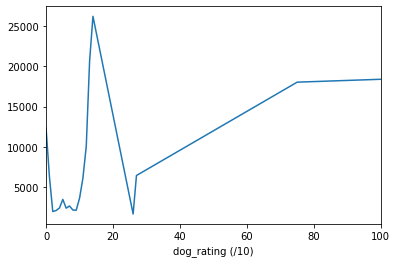

In [329]:
ratingmean = all3data.groupby(['dog_rating (/10)']).mean().astype(int)
print(ratingmean)

ax = ratingmean['favorite_count'].plot()
ax.set_xlim(0,100)




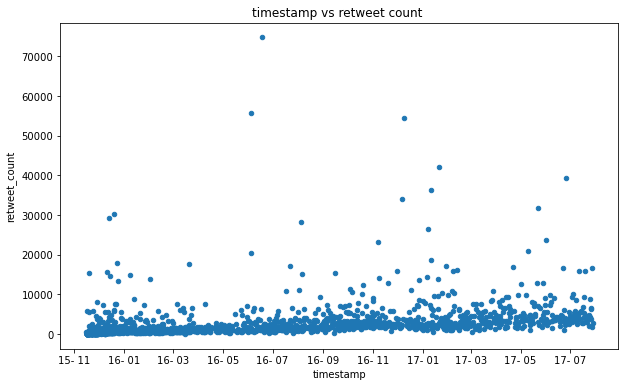

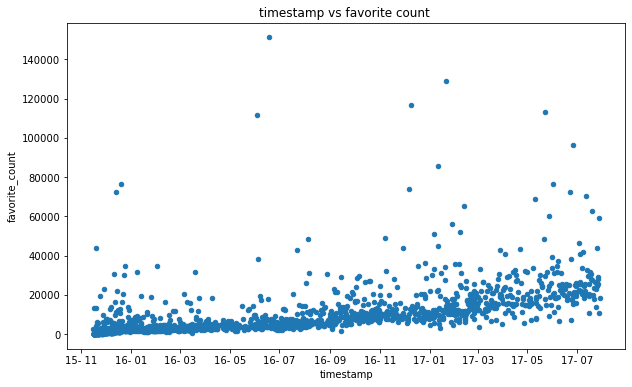

In [385]:
all32 = all3data.plot.scatter(x='timestamp', y='retweet_count', title='timestamp vs retweet count ', figsize=(10, 6))
all32.xaxis.set_major_formatter(mdates.DateFormatter('%y- %m')) 


all92 = all3data.plot.scatter(x='timestamp', y='favorite_count', title='timestamp vs favorite count ',figsize=(10, 6))
all92.xaxis.set_major_formatter(mdates.DateFormatter('%y- %m')) 

no = all3data['dog_stage'] != 'None'
all3non = all3data[no]
ax = all3non['dog_stage'].value_counts(normalize=True)



In [178]:
#Looking at the name column - looks as though some aren't names. I will look at the ones not in capitals

all3data['name'].value_counts()

None       530
a           54
Oliver      10
Charlie     10
Cooper      10
          ... 
Horace       1
Skye         1
Shadoe       1
DonDon       1
Bradley      1
Name: name, Length: 928, dtype: int64

In [334]:
lower = all3data['name'].str.islower()

lowerall = all3data[lower]
lowerindex = lowerall.index

#lowerall['name'].value_counts()

all3data = all3data.drop(lowerindex) 

all3data['name'].value_counts()

None       530
Oliver      10
Cooper      10
Charlie     10
Penny        9
          ... 
Tonks        1
Yoda         1
Caryl        1
Keet         1
Bradley      1
Name: name, Length: 905, dtype: int64

This shows that the names not in capitals are not actually names. Therefore I have dropped these rows. I have kept 'None' as a name as some of the posts do not say a name of the dog, just a breed.

In [ ]:
all3data

In [386]:
all3data.to_csv('twitter_archive_master.csv', index=False)